In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from datetime import datetime as dt
import plotly.express as px
import calendar
import plotly.io as pio
pio.templates
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [ ]:
df=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


###Preprocessing of the data

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [ ]:
df.info

<bound method DataFrame.info of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98

In [ ]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
df.isnull().any()

Region                                      False
 Date                                       False
 Frequency                                  False
 Estimated Unemployment Rate (%)            False
 Estimated Employed                         False
 Estimated Labour Participation Rate (%)    False
Region.1                                    False
longitude                                   False
latitude                                    False
dtype: bool

In [ ]:
missing_value=["N/a","na",np.nan]
df=pd.read_csv("Unemployment_Rate_upto_11_2020.csv",na_values=missing_value)    #dealing with NAN values
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


###Data Visualization

<Axes: >

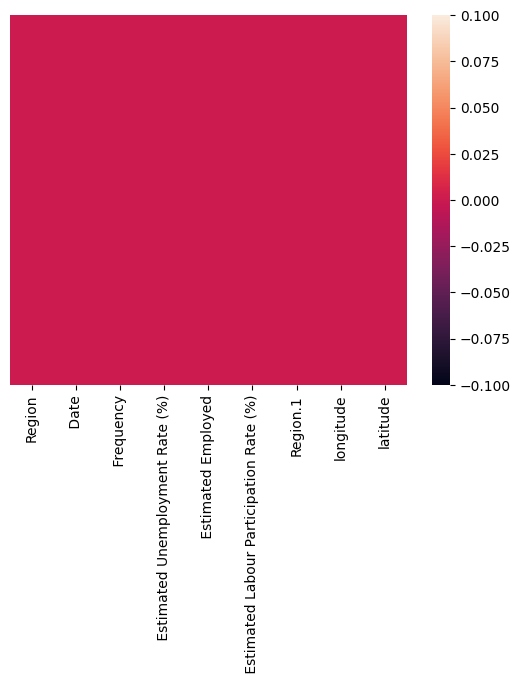

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False)

In [ ]:
column=list(df.columns)
column

['Region',
 ' Date',
 ' Frequency',
 ' Estimated Unemployment Rate (%)',
 ' Estimated Employed',
 ' Estimated Labour Participation Rate (%)',
 'Region.1',
 'longitude',
 'latitude']

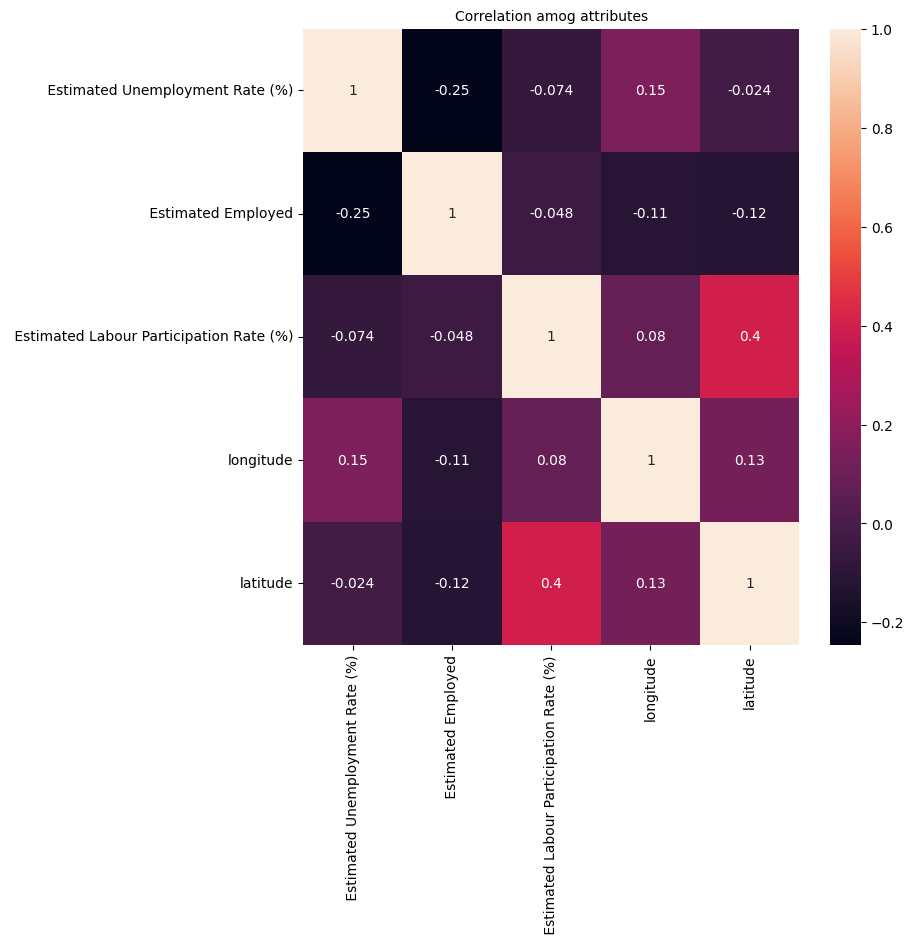

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df[[' Estimated Unemployment Rate (%)',
                ' Estimated Employed',
                ' Estimated Labour Participation Rate (%)',
                'longitude',
                'latitude']].corr(),annot=True).set_title('Correlation amog attributes',fontsize=10)
plt.show()

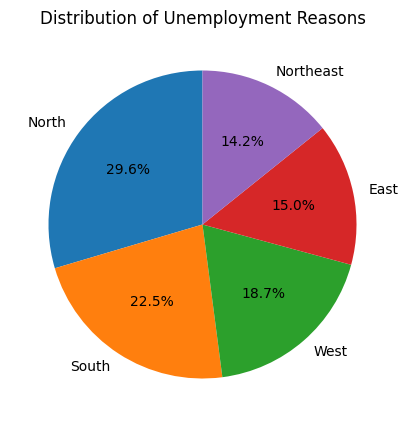

In [ ]:
reason_counts=df['Region.1'].value_counts()
plt.figure(figsize=(7,5))
plt.pie(reason_counts, labels=reason_counts.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Distribution of Unemployment Reasons')
plt.show()

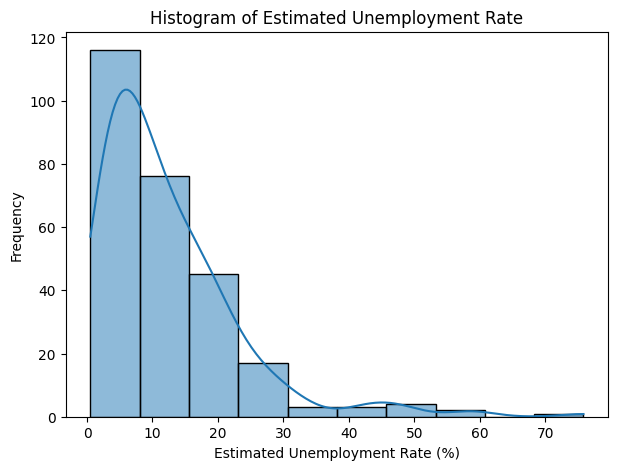

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df[' Estimated Unemployment Rate (%)'], bins=10, kde=True)
plt.title(f'Histogram of Estimated Unemployment Rate')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

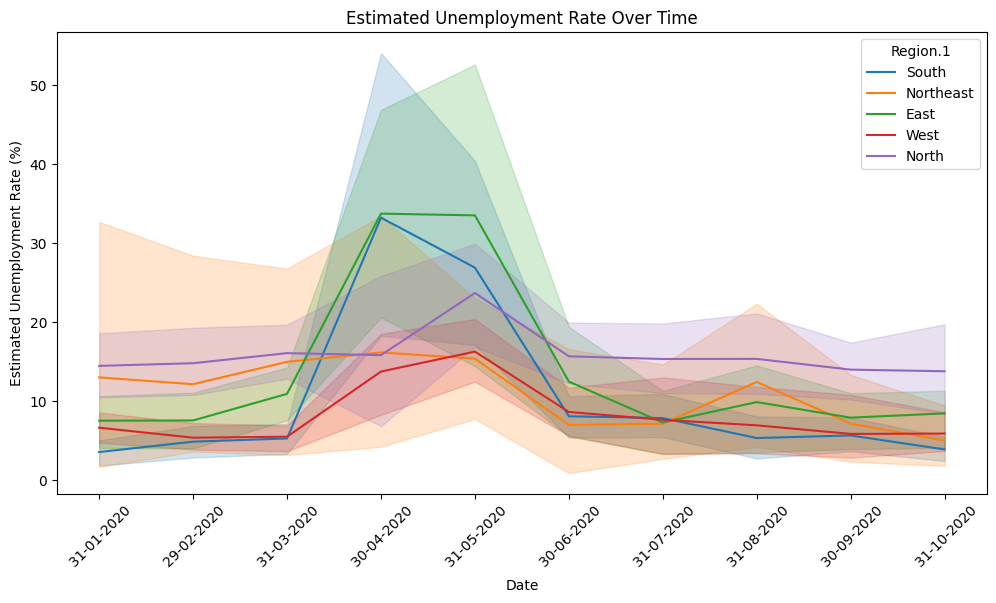

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=' Date', y=' Estimated Unemployment Rate (%)', hue='Region.1')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

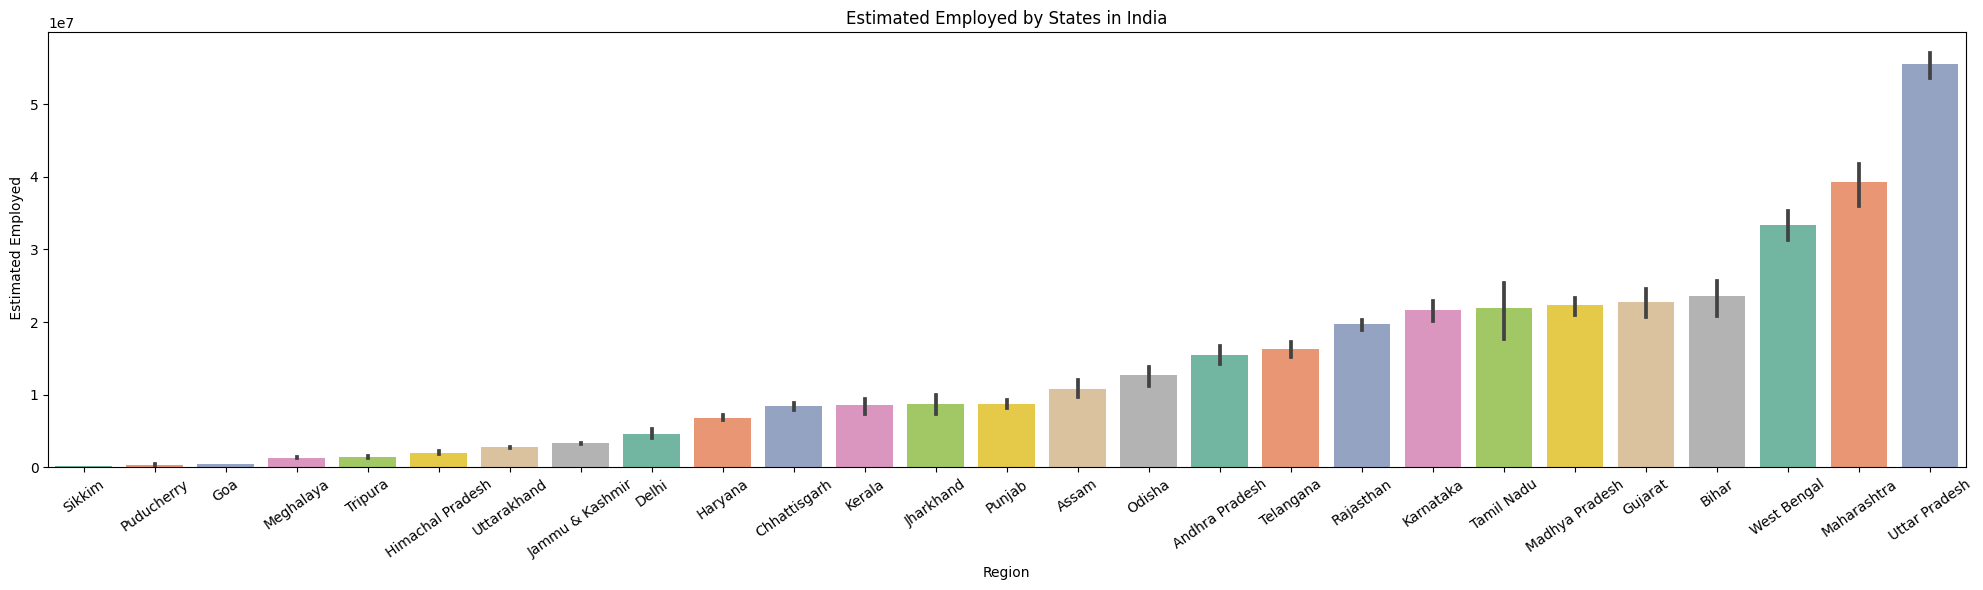

In [ ]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=35)
sns.barplot(data=df, x='Region', y=' Estimated Employed',palette='Set2',order=df.groupby('Region')[' Estimated Employed'].mean().sort_values().index)
plt.title('Estimated Employed by States in India')
plt.tight_layout()

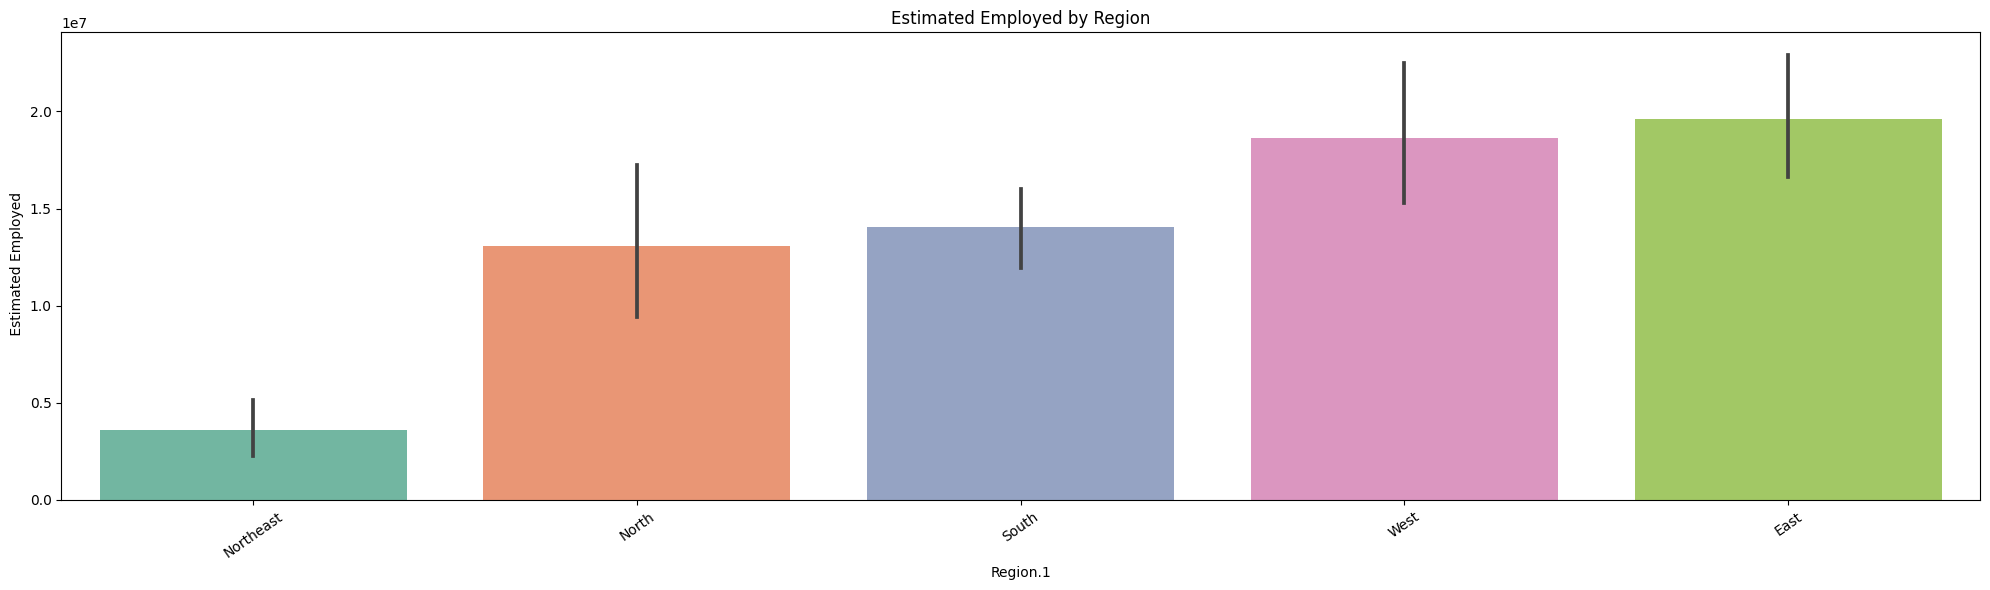

In [ ]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=35)
sns.barplot(data=df, x='Region.1', y=' Estimated Employed',palette='Set2',order=df.groupby('Region.1')[' Estimated Employed'].mean().sort_values().index)
plt.title('Estimated Employed by Region')
plt.tight_layout()

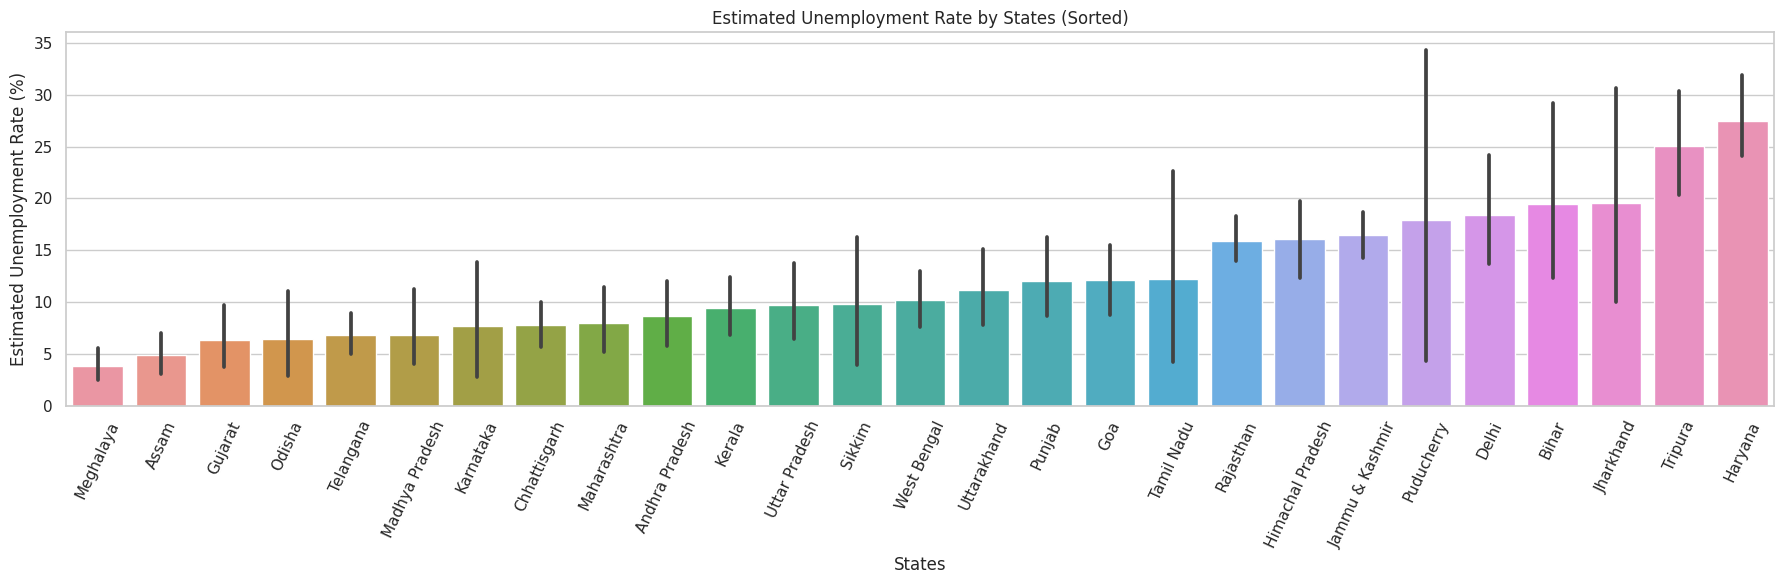

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x='Region', y=' Estimated Unemployment Rate (%)', order=df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values().index)
plt.xlabel('States')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate by States (Sorted)')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

In [ ]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Frequency'] = df['Frequency'].astype('category')
df['Month'] = df['Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x: int(x))
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])
df['Region'] = df['Region'].astype('category')
df.drop(columns='Month', inplace=True)

In [ ]:
fig = px.bar(df, x='Region',y='Estimated Unemployment Rate',animation_frame = 'Month_name',color='States',
            title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700,template='plotly')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()

In [ ]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='plotly',title='Impack of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

In [ ]:
df_india=pd.read_csv("/content/Unemployment in India.csv")
df_india

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_india.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df_india['Date'] = pd.to_datetime(df_india[' Date'])
df_india['Month']=df_india['Date'].dt.month_name()
df_india['Year']=df_india['Date'].dt.year
df_india.drop([' Frequency'],axis=1,inplace=True)
df_india.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,Month,Year
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural,2019-05-31,May,2019.0
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural,2019-06-30,June,2019.0
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural,2019-07-31,July,2019.0
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural,2019-08-31,August,2019.0
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural,2019-09-30,September,2019.0


In [ ]:
df_india['Year'].value_counts()

2019.0    430
2020.0    310
Name: Year, dtype: int64

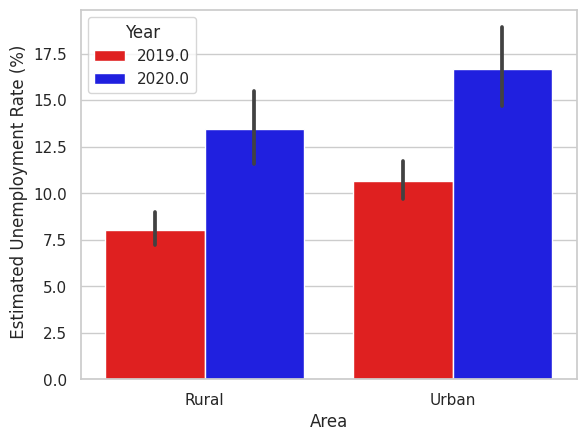

In [ ]:
sns.barplot(data=df_india, x='Area', y=' Estimated Unemployment Rate (%)', hue='Year', palette=['red', 'blue'])
plt.show()

##Linear Regression

In [ ]:
X = df[[' Date']]
y = df[' Estimated Unemployment Rate (%)']

In [ ]:
# Convert the 'Date' column to a numerical representation for the model
X[' Date'] = pd.to_datetime(X[' Date']).astype(int) / 10**9

<ipython-input-16-2e9ee9f4d071>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[' Date'] = pd.to_datetime(X[' Date']).astype(int) / 10**9


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_linear = linear_model.predict(X_test)

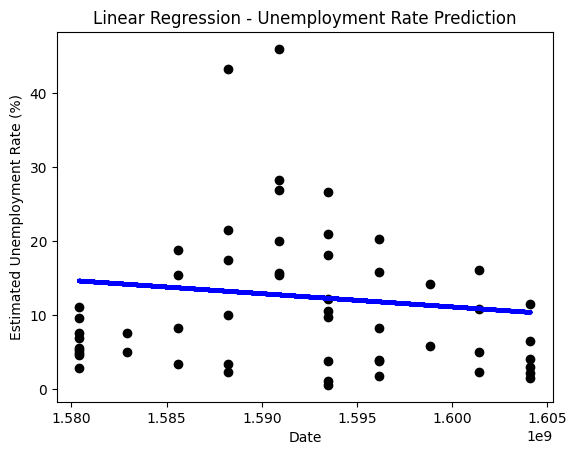

In [ ]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred_linear, color='blue', linewidth=3)
plt.title('Linear Regression - Unemployment Rate Prediction')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()
